
CSE 5243

# Getting Started with Pandas

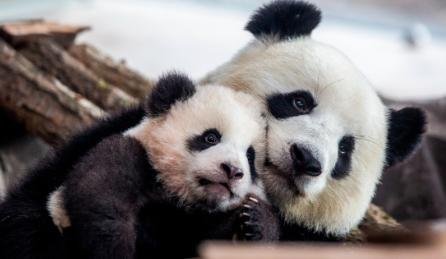

In this notebook, we'll get experience using Pandas `DataFrame` and `Series` objects and functions
to explore the [Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone) dataset.

#### Learning objectives: Use Pandas to
1. Load a dataset
2. Look at the data
3. Describe the data: types, values, and basic statistics
4. Describe relationships among the data
5. Perform basic manipulations

In [1]:
import pandas as pd
import numpy as np

## 1. Load the dataset

Let's start by downloading a copy of the `abalone` dataset. from the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).

In [2]:
!wget -nc -P .local_data https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

File '.local_data/abalone.data' already there; not retrieving.



Based on the [documentation](https://archive.ics.uci.edu/ml/datasets/Abalone),
we know that the attributes and types are as follows:

|Name|Data Type|Meas.|Description|
|-|-|-|-|
|Sex|nominal|M, F, I|male, female, or infant|
|Length|continuous|mm|Longest shell measurement|
|Diameter|continuous|mm|perpendicular to length|
|Height|continuous|mm|with meat in shell|
|Whole weight|continuous|grams|whole abalone|
|Shucked weight|continuous|grams|weight of meat|
|Viscera weight|continuous|grams|gut weight (after bleeding)|
|Shell weight|continuous|grams|after being dried|
|Rings|continuous|integers|+1.5 gives the age in years|

In [3]:
# We must define the columns, because they are not present in the raw data file.
df_cols = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
    'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'
]

# Load the data from our local copy
df = pd.read_csv('.local_data/abalone.data', names=df_cols)

## 2. Look at the data

In this section, we'll learn how to examine the data so that we
can begin to "get a feel" for it.

In [4]:
# Display the first N rows of the data:
df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [5]:
# Display the last six rows of the data frame
df.tail(6)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
# Display 3 rows at random
# This is useful for "spot checking" the data
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1030,F,0.645,0.515,0.150,1.212,0.5150,0.2055,0.3850,10
3607,M,0.515,0.390,0.140,0.678,0.3410,0.1325,0.1190,8
3063,F,0.635,0.490,0.155,1.145,0.4775,0.3035,0.3155,9


## 3. Describe the data

### What are the dimensions of the dataframe?

How many rows and how many columns? You should end up with 4,177 rows and 9 columns.

In [7]:
df.shape

(4177, 9)

### What are the names of the attributes?

Hint: Do NOT use the `df_cols` variable.

In [8]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### What are the types of the attributes?

Hint: use the `dtypes` attribute.

In [9]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Hint: You can get even more information about the data by using the `info()` function.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Display basic statistics for the numeric attributes.

In [11]:
# Describe the data (by default, basic statistics for numeric columns only)
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Display basic statistics for the “Length” attribute only.

In [12]:
df['Length'].describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

### Display basic statistics for the non-numeric (object) attributes

In [14]:
# df.describe(include=np.object) # An older way of doing this
df.describe(include=object)

,Sex
count,4177
unique,3
top,M
freq,1528


### Categoricals in Pandas

`Sex` is a categorical attribute. Let's look at it more closely.

In [15]:
# What are the levels and counts?
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [16]:
# Pandas supports a special data type for categorical attributes.
# Let's convert it
# Convert to category type
df['Sex'] = df['Sex'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [17]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

### Functions on Columns

There are many useful functions of
[Pandas Series objects](https://pandas.pydata.org/pandas-docs/stable/reference/series.html).

In [18]:
df['Length'].min()

0.075

In [19]:
df['Length'].max()

0.815

In [20]:
df['Length'].mean()

0.5239920995930094

In [21]:
df['Length'].std()

0.12009291256479956

## 4. Describe relationships among the data

In [22]:
# Generate a correlation matrix for the numeric attributes
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## 5. Perform Basic Manipulations

### How to reference an entire column
The result is a Pandas `Series` object.

In [23]:
df.Length

0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64

In [24]:
length_column = df['Length']
print(type(length_column))

<class 'pandas.core.series.Series'>


You can also reference columns using this shorter notation. But beware, this won't work
if the column name has spaces or other characters meaningful in Python syntax.

In [25]:
df.Diameter

0       0.365
1       0.265
2       0.420
3       0.365
4       0.255
        ...  
4172    0.450
4173    0.440
4174    0.475
4175    0.485
4176    0.555
Name: Diameter, Length: 4177, dtype: float64

### How to convert a Pandas Series to a Numpy array

Sometimes we'll need to convert columns (Pandas Series) to a Numpy array.

In [26]:
length_ndarray = df['Length'].values
print(type(length_ndarray))

<class 'numpy.ndarray'>


In [27]:
length_ndarray

array([0.455, 0.35 , 0.53 , ..., 0.6  , 0.625, 0.71 ])

We can also convert a Series to an ordinary Python list.

In [28]:
length_list = df['Length'].tolist()
print(type(length_list))
print(len(length_list))

<class 'list'>
4177


In [29]:
length_list

[0.455,
 0.35,
 0.53,
 0.44,
 0.33,
 0.425,
 0.53,
 0.545,
 0.475,
 0.55,
 0.525,
 0.43,
 0.49,
 0.535,
 0.47,
 0.5,
 0.355,
 0.44,
 0.365,
 0.45,
 0.355,
 0.38,
 0.565,
 0.55,
 0.615,
 0.56,
 0.58,
 0.59,
 0.605,
 0.575,
 0.58,
 0.68,
 0.665,
 0.68,
 0.705,
 0.465,
 0.54,
 0.45,
 0.575,
 0.355,
 0.45,
 0.55,
 0.24,
 0.205,
 0.21,
 0.39,
 0.47,
 0.46,
 0.325,
 0.525,
 0.52,
 0.4,
 0.485,
 0.47,
 0.405,
 0.5,
 0.445,
 0.47,
 0.245,
 0.505,
 0.45,
 0.505,
 0.53,
 0.425,
 0.52,
 0.475,
 0.565,
 0.595,
 0.475,
 0.31,
 0.555,
 0.4,
 0.595,
 0.57,
 0.605,
 0.6,
 0.595,
 0.6,
 0.555,
 0.615,
 0.575,
 0.62,
 0.52,
 0.595,
 0.58,
 0.57,
 0.625,
 0.56,
 0.46,
 0.575,
 0.565,
 0.555,
 0.595,
 0.625,
 0.695,
 0.665,
 0.535,
 0.47,
 0.47,
 0.475,
 0.36,
 0.55,
 0.53,
 0.53,
 0.605,
 0.52,
 0.545,
 0.5,
 0.51,
 0.435,
 0.495,
 0.465,
 0.435,
 0.425,
 0.545,
 0.53,
 0.49,
 0.44,
 0.56,
 0.405,
 0.47,
 0.385,
 0.515,
 0.37,
 0.36,
 0.27,
 0.375,
 0.385,
 0.7,
 0.71,
 0.595,
 0.44,
 0.325,
 0.35,
 0.26

### Other column manipulations

In [30]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [31]:
# Create a new column from a literal
df['lit'] = "Hello"

In [32]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,lit
1453,I,0.470,0.350,0.125,0.4315,0.190,0.1165,0.1175,6,Hello
781,M,0.505,0.385,0.150,0.6415,0.246,0.1520,0.2150,12,Hello
4157,M,0.475,0.360,0.140,0.5135,0.241,0.1045,0.1550,8,Hello


In [33]:
# We can create a new column that is the result of a calculation on other columns:
df['Area'] = df['Length'] * df['Height']

In [34]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,lit,Area
1690,M,0.625,0.50,0.170,1.0985,0.4645,0.2200,0.354,9,Hello,0.106250
2655,M,0.545,0.42,0.145,0.7780,0.3745,0.1545,0.205,7,Hello,0.079025
2599,M,0.610,0.48,0.150,1.1495,0.5640,0.2740,0.264,8,Hello,0.091500


In [35]:
# And we can delete columns when we don't want them any more.
del df['lit'], df['Area']

In [36]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1740,F,0.675,0.510,0.195,1.3820,0.6045,0.3175,0.3965,10
464,I,0.255,0.195,0.070,0.0735,0.0255,0.0200,0.0250,6
3104,M,0.660,0.525,0.200,1.4890,0.6065,0.3795,0.4210,10


### Convert a column to a new type

In [37]:
# Convert int to float
df['Rings'] = df['Rings'].astype('float32')

In [38]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3291,M,0.53,0.405,0.130,0.738,0.2845,0.170,0.193,9.0
2162,F,0.71,0.565,0.195,1.817,0.7850,0.492,0.490,11.0
3209,I,0.43,0.340,0.125,0.384,0.1375,0.061,0.146,14.0


### Get numpy n-dimensional array (matrix) representation

In [39]:
# Get data as numpy ndarray
matr = df.values
matr.shape

(4177, 9)

In [40]:
# reference the first column
matr[:,0]

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [41]:
# reference the first row
matr[0]

array(['M', 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15, 15.0],
      dtype=object)

### Manufacture a new categorical

In [42]:
df['Type'] = pd.Series(np.random.choice(['a', 'b', 'c'], len(df))).astype('category')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Type
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,c
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,a
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,a
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,c
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,c
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,a
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,c
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,a
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,a


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   float32 
 9   Type            4177 non-null   category
dtypes: category(2), float32(1), float64(7)
memory usage: 253.3 KB


### One-hot Encode (1HE) a categorical

In [44]:
# Now let's one hot encode to a temporary data frame
tmpdf = pd.get_dummies(df['Sex'], prefix='sex_')
tmpdf

,sex__F,sex__I,sex__M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [45]:
# We can do this all in one step for all the categorical variables
categ_attrs = ['Sex', 'Type']
one_hot_df = pd.concat([pd.get_dummies(df[col],prefix=col) for col in categ_attrs], axis=1)
one_hot_df

,Sex_F,Sex_I,Sex_M,Type_a,Type_b,Type_c
0,0,0,1,0,0,1
1,0,0,1,1,0,0
2,1,0,0,1,0,0
3,0,0,1,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
4172,1,0,0,1,0,0
4173,0,0,1,0,0,1
4174,0,0,1,1,0,0
4175,1,0,0,1,0,0


### Factorize a categorical

In [46]:
# This object preserves the species-to-class mapping
sex_classes = pd.factorize(df['Sex'],)
sex_classes

(array([0, 0, 1, ..., 0, 1, 0]),
 CategoricalIndex(['M', 'F', 'I'], categories=['F', 'I', 'M'], ordered=False, dtype='category'))

In [47]:
type(sex_classes)

tuple

In [48]:
len(sex_classes)

2

In [49]:
# levels have been converted to numerics (0, 1, or 2)
sex_classes[0]

array([0, 0, 1, ..., 0, 1, 0])

In [50]:
sex_classes[1]

CategoricalIndex(['M', 'F', 'I'], categories=['F', 'I', 'M'], ordered=False, dtype='category')